# Diabetes predication system with KNN algorithm

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv("diabetes.csv")

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [69]:
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']


In [70]:
X= df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']]

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc = StandardScaler()

In [73]:
sc.fit(X)

StandardScaler()

In [74]:
scaler = sc.transform(X)

In [75]:
dff = pd.DataFrame(scaler,columns=df.columns[:-1])

In [76]:
dff.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test, y_train, y_test = train_test_split(scaler,df['Outcome'],test_size=0.2)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
prediction = knn.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
print(confusion_matrix(y_test,prediction))

[[87 17]
 [22 28]]


In [85]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       104
           1       0.62      0.56      0.59        50

    accuracy                           0.75       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.74      0.75      0.74       154



#### Elbow method

In [86]:
error_rate = []
for i in range(1, 40):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

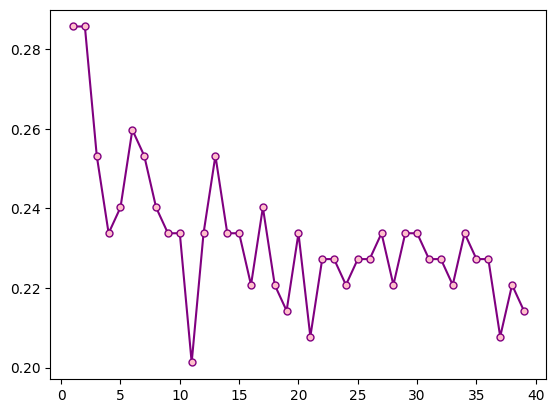

In [87]:
plt.plot(range(1,40),error_rate,color ='purple',marker='.',markerfacecolor='pink',markersize=10)

In [98]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
predic = knn.predict(X_test)

In [89]:
print(confusion_matrix(y_test,predic))

[[98  6]
 [30 20]]


In [99]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       104
           1       0.74      0.46      0.57        50

    accuracy                           0.77       154
   macro avg       0.76      0.69      0.71       154
weighted avg       0.77      0.77      0.76       154



In [103]:
y_test

565    0
311    0
567    0
530    0
553    0
      ..
140    0
566    0
215    1
288    0
469    0
Name: Outcome, Length: 154, dtype: int64

In [100]:
predic

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)